<a href="https://colab.research.google.com/github/ShashankKamath/CSCE_633_MachineLearning/blob/master/PCA_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
f = np.asarray([1,2,1, 3, 2, 3, 1, 2, 3, 8, 7, 8, 9, 9, 7, 8])
# w = np.asarray([1,1,1])
w = np.asarray([1,0,-1])
    

In [0]:
signal=np.convolve(f,w,'valid')
signal

array([ 0,  1,  1,  0, -1, -1,  2,  6,  4,  0,  2,  1, -2, -1])

In [0]:
def convolve1d(signal,filter):
  n=signal.shape[0]
  m=filter.shape[0]
  length=n-m+1
  result=[0]*length
  for i in range(2,length+2):
    result[i-2] = 0;
    for j in range(m):
        result[i-2] += signal[i - j] * filter[j];
  return result   
convolve1d(f,w)

[0, 1, 1, 0, -1, -1, 2, 6, 4, 0, 2, 1, -2, -1]

2d Convolution

In [0]:
I=np.asarray([[164, 188,164, 161, 195],[178, 201, 197, 150, 137],[174, 168, 181, 190, 184],[131, 179, 176, 185, 198],[92, 185 ,179, 133 ,167]])
F1=np.asarray([[1,1,1],[1,1,1],[1,1,1]])
F2=np.asarray([[-1,-2,-1],[0,0,0],[1,2,1]])
F3=np.asarray([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])


In [0]:
from scipy import signal
d=signal.convolve2d(F2,I, mode='valid')
d

array([[  13,  -43,  -64],
       [ 112,   29, -110],
       [  50,   44,  133]])

In [0]:
def convolution2d(Image, filter):
    m, n = filter.shape
    if (m == n):
        y, x = Image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(Image[i:i+m, j:j+m]*filter)
    return new_image

In [0]:
a=convolution2d(I,F1)
a

array([[1615., 1600., 1559.],
       [1585., 1627., 1598.],
       [1465., 1576., 1593.]])

In [0]:
b=convolution2d(I,F2)
b

array([[ -13.,   43.,   64.],
       [-112.,  -29.,  110.],
       [ -50.,  -44., -133.]])

In [0]:
c=convolution2d(I,F3,0)
c

array([[395., 370., -59.],
       [ 95., 183., 302.],
       [325., 184., 257.]])

# 2nd Question PCA


In [0]:
from google.colab import files
uploaded = files.upload()

Saving subject01.gif to subject01 (2).gif
Saving subject01.glasses.gif to subject01.glasses.gif
Saving subject01.happy to subject01.happy
Saving subject01.leftlight.gif to subject01.leftlight.gif
Saving subject01.noglasses.gif to subject01.noglasses.gif
Saving subject01.normal to subject01.normal
Saving subject01.rightlight.gif to subject01.rightlight.gif
Saving subject01.sad to subject01.sad
Saving subject01.sleepy to subject01.sleepy
Saving subject01.surprised.gif to subject01.surprised.gif
Saving subject01.wink to subject01.wink
Saving subject02.centerlight.gif to subject02.centerlight.gif
Saving subject02.glasses.gif to subject02.glasses.gif
Saving subject02.happy to subject02.happy
Saving subject02.leftlight.gif to subject02.leftlight.gif
Saving subject02.noglasses.gif to subject02.noglasses.gif
Saving subject02.normal to subject02.normal
Saving subject02.rightlight.gif to subject02.rightlight.gif
Saving subject02.sad to subject02.sad
Saving subject02.sleepy to subject02.sleepy
Sa

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/yalefaces'
import os
os.chdir('/content/drive/My Drive/yalefaces')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Icon_			   subject05.wink	      subject11.centerlight.gif
Readme.txt		   subject06.centerlight.gif  subject11.glasses.gif
subject01.gif		   subject06.glasses.gif      subject11.happy
subject01.glasses.gif	   subject06.happy	      subject11.leftlight.gif
subject01.happy		   subject06.leftlight.gif    subject11.noglasses.gif
subject01.leftlight.gif    subject06.noglasses.gif    subject11.normal
subject01.noglasses.gif    subject06.normal	      subject11.rightlig

In [0]:
from PIL import Image
import numpy as np
import glob
def dataset():
    images = []
    for i in range(1, 16):
        filelist = glob.glob('./subject'+str(i).zfill(2)+"*")
        for filename in filelist:
            img = np.array(Image.open(filename))
            img = img.reshape(img.shape[0]*img.shape[1])
            images.append(img)
    images = np.array(images)
    return images
images = dataset()
num_components = len(images)

In [0]:
def normalize(images):
    mean_vector = np.mean(images, axis=0)
    norm_images = images - mean_vector
    return norm_images, mean_vector
norm_images, mean_vector = normalize(images)

In [0]:
from numpy import linalg as la
def calculate_eigen(norm_images):
    covariance_matrix = np.dot(norm_images, norm_images.T)
    eigen_values, eigen_vectors_1 = la.eig(covariance_matrix)
    eigen_vectors = np.dot(norm_images.T, eigen_vectors_1)
    for i in range(eigen_vectors.shape[1]):
        eigen_vectors[:, i] = eigen_vectors[:, i]/la.norm(eigen_vectors[:, i])
    return eigen_values.astype(float), eigen_vectors.astype(float)
eigen_values, eigen_vectors = calculate_eigen(norm_images)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [0]:
def pca(eigen_values, eigen_vectors, k):
    k_eigen_values = eigen_values.argsort()[-k:][::-1]
    eigen_faces = []
    for i in k_eigen_values:
        eigen_faces.append(eigen_vectors[:, i])
    eigen_faces = np.array(eigen_faces)
    return eigen_faces
eigen_faces = pca(eigen_values, eigen_vectors, num_components)

In [0]:
def reconstruct_images(eigen_faces, mean_vector):
	original_eigen_face = []  
	for i in range(eigen_faces.shape[0]):
		original_eigen_face.append(eigen_faces[i].reshape(243, 320))
	original_eigen_face = np.array(original_eigen_face)  
	return original_eigen_face
original_eigen_face = reconstruct_images(eigen_faces, mean_vector)

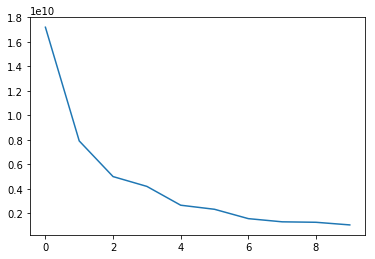

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(eigen_values[:10])
plt.show()
plt.clf()

In [0]:
from numpy import trapz
total_energy = trapz(eigen_values, dx=1)
print("Total Energy:", total_energy)
k = 0
while True:
	k_energy = trapz(eigen_values[:k], dx=1)
	print("Energy captured by", k, "components:", k_energy)
	if k_energy >= 0.5*total_energy:
		break
	k += 1
print("Number of components to capture 50% energy:", k)

Total Energy: 47692294393.44961
Energy captured by 0 components: 0.0
Energy captured by 1 components: 0.0
Energy captured by 2 components: 12546502748.638348
Energy captured by 3 components: 18994191128.31875
Energy captured by 4 components: 23585255322.409824
Energy captured by 5 components: 27007219964.47441
Number of components to capture 50% energy: 5


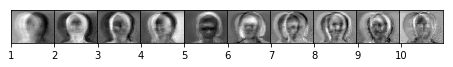

In [0]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 10, top=1., bottom=0., right=1., left=0., hspace=0., wspace=0.)   
i = 0
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(original_eigen_face[i], cmap = plt.get_cmap("gray"))
    ax.set_xticks([i+1])
    ax.set_yticks([])
    i += 1


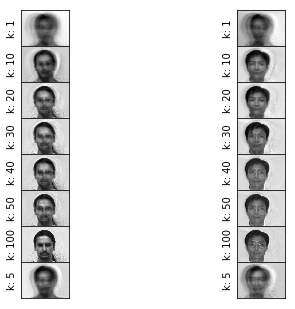

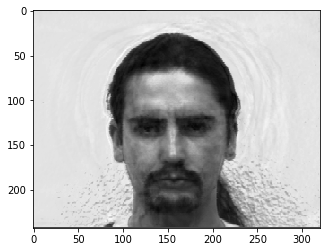

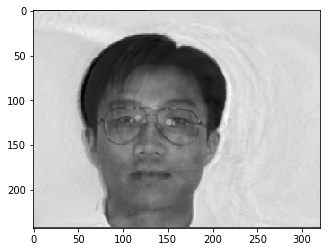

<Figure size 432x288 with 0 Axes>

In [0]:
import random
k = np.concatenate(([1, 10, 20, 30, 40, 50, 100], [k]))
random1 = 0
random2 = 0
while random1==random2:
    random1 = random.randint(0, len(norm_images)-1)
    random2 = random.randint(0, len(norm_images)-1)
sample1 = norm_images[random1]
sample2 = norm_images[random2]

def project(original_input, eigen_faces):
    return np.dot(original_input, eigen_faces.T)

def reconstruct(projected_input, eigen_faces):
    reconstructed_input = []
    reconstructed_input = np.dot(projected_input, eigen_faces)
    mean_vector = np.mean(images, axis=0)
    return reconstructed_input + mean_vector

outputs = []
for j in k:
    projected_input1 = project(sample1, eigen_faces[:j])
    reconstructed_input1 = reconstruct(projected_input1, eigen_faces[:j])
    outputs.append(reconstructed_input1)

    projected_input2 = project(sample2, eigen_faces[:j])
    reconstructed_input2 = reconstruct(projected_input2, eigen_faces[:j])
    outputs.append(reconstructed_input2)

gs = gridspec.GridSpec(len(k), 2, top=1., bottom=0., right=1., left=0., hspace=0., wspace=0.)   

i = 0
for g in gs:
    ax = plt.subplot(g)
    plt.ylabel("k: "+str(k[int(i/2)]))
    ax.imshow(outputs[i].reshape(243, 320), cmap = plt.get_cmap("gray"))
    ax.set_xticks([])
    ax.set_yticks([])
    i += 1    

plt.show()
plt.clf()

plt.imshow(outputs[12].reshape(243, 320), cmap = plt.get_cmap("gray"))
plt.show()
plt.clf()

plt.imshow(outputs[13].reshape(243, 320), cmap = plt.get_cmap("gray"))
plt.show()
plt.clf()

In [0]:
train = []
test = []
i = 0
while i!=15:
    random1 = random.randint(0,10)
    random2 = random.randint(0,10)
    if random1!=random2:
        for j in range(11):
            if j==random1 or j==random2:
                test.append(np.concatenate((images[i*11+j],[i])))
            else:
                train.append(np.concatenate((images[i*11+j],[i])))
        i += 1

np.random.shuffle(train)
np.random.shuffle(test)
        
train = np.array(train)
test = np.array(test)
train_X = train[:, :train.shape[1]-1]
test_X = test[:, :test.shape[1]-1]
train_Y = train[:, train.shape[1]-1]
test_Y = test[:, test.shape[1]-1]

In [0]:
from __future__ import division
import sklearn
from sklearn import preprocessing
from scipy.spatial import distance
import matplotlib.pyplot as plt

def knn(cv_test, cv_train, best_k, cv_train_Y):
    dist = np.ndarray(shape=(len(cv_test), len(cv_train)))
    for i in range (0, len(cv_test)):
        for j in range (0, len(cv_train)):
            dist[i][j] = distance.euclidean(cv_test[i], cv_train[j])
    k_best = np.ndarray(shape=(len(cv_test), best_k))
    for i in range (0, len(cv_test)):
        k_best[i] = dist[i].argsort()[:best_k][::1]
    y_pred = np.ndarray(shape=(len(cv_test)))
    for i in range (0, len(cv_test)):
        count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for j in range (0, best_k):
            pred_k = cv_train_Y[int(k_best[i][j])]
            count[pred_k] += 1
        y_pred[i] = np.argmax(count)
    return y_pred

def knn_cross_val(train_X, train_Y):
#     k = [3, 5, 7, 9, 11]
    k=range(5,31,2)
    knn_num_folds = 5
    knn_cv_acc = np.ndarray(shape=(knn_num_folds, len(k)))
    n = int(round((len(train_X))/len(k)))

    for i in range (knn_num_folds):
        if i==(len(k)-1):
            cv_test = train_X[n*i:]
            cv_test_Y = train_Y[n*i:]
            cv_train = train_X[:n*i]
            cv_train_Y = train_Y[:n*i]
        elif i==0:
            cv_test = train_X[:n]
            cv_test_Y = train_Y[:n]
            cv_train = train_X[n:]
            cv_train_Y = train_Y[n:]
        else:
            temp = np.split(train_X, [n*i, n*(i+1)])
            temp_Y = np.split(train_Y, [n*i, n*(i+1)])
            cv_test = temp[1]
            cv_train = np.concatenate((temp[0], temp[2]))
            cv_test_Y = temp_Y[1]
            cv_train_Y = np.concatenate((temp_Y[0], temp_Y[2]))
        
        for l in range(len(k)):
            pred_y = knn(cv_test, cv_train, k[l], cv_train_Y)

            count = 0
            for j in range(0, len(cv_test_Y)):
                if cv_test_Y[j]==pred_y[j]:
                    count += 1
            knn_cv_acc[i, l] = count/len(cv_test_Y)

    accuracies = np.mean(knn_cv_acc, axis=0)
    best_k_knn = k[np.argmax(accuracies)]

    return best_k_knn

In [0]:
def cross_val(train_X, train_Y):
    num_folds = 5
#     k = [10,20,30,40,50]
    k=range(5,51,2)
    cv_acc = np.ndarray((num_folds, len(k)))
    n = int(round((len(train_X))/num_folds))
    
    for i in range(num_folds):
        if i==(num_folds-1):
            cv_test = train_X[n*i:]
            cv_test_Y = train_Y[n*i:]
            cv_train = train_X[:n*i]
            cv_train_Y = train_Y[:n*i]
        elif i==0:
            cv_test = train_X[:n]
            cv_test_Y = train_Y[:n]
            cv_train = train_X[n:]
            cv_train_Y = train_Y[n:]
        else:
            temp = np.split(train_X, [n*i, n*(i+1)])
            temp_Y = np.split(train_Y, [n*i, n*(i+1)])
            cv_test = temp[1]
            cv_train = np.concatenate((temp[0], temp[2]))
            cv_test_Y = temp_Y[1]
            cv_train_Y = np.concatenate((temp_Y[0], temp_Y[2]))   
            
        for j in range(len(k)):
            train_project = project(cv_train, eigen_faces[:k[j]])
            test_project = project(cv_test, eigen_faces[:k[j]])
        
            train_project = sklearn.preprocessing.normalize(train_project)
            test_project = sklearn.preprocessing.normalize(test_project)
        
            best_k = knn_cross_val(train_project, cv_train_Y)
            pred_y = knn(test_project, train_project, best_k, cv_train_Y)
            
            count = 0
            for m in range(0, len(cv_test_Y)):
                if cv_test_Y[m]==pred_y[m]:
                    count += 1

            cv_acc[i, j] = count/len(cv_test_Y)
    
    accuracies = np.mean(cv_acc, axis=0)
    best_k_pca = k[np.argmax(accuracies)]
    return best_k_pca

best_k_pca = cross_val(train_X, train_Y)
print("Best k for PCA:", best_k_pca)

projected_trainX = project(train_X, eigen_faces[:best_k_pca])
projected_testX = project(test_X, eigen_faces[:best_k_pca])

train_X_norm = sklearn.preprocessing.normalize(projected_trainX)
test_X_norm = sklearn.preprocessing.normalize(projected_testX)

best_k = knn_cross_val(train_X_norm, train_Y)
print("KNN",best_k)
pred_y = knn(test_X_norm, train_X_norm, best_k, train_Y)

count = 0
for j in range(0, len(test_Y)):
	if test_Y[j]==pred_y[j]:
		count += 1

accuracy = count/len(test_Y)
print("Test accuracy:", accuracy)

Best k for PCA: 21
KNN 11
Test accuracy: 0.7


Best k for PCA: 30
Test accuracy: 0.9


Best k for PCA: 25
Test accuracy: 0.9

Best k for PCA: 19
Test accuracy: 0.8666666666666667

Best k for PCA: 41
Test accuracy: 0.9

Test image:


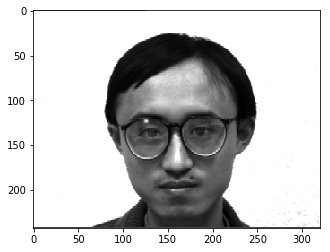

Face recognized is of Subject: 08


<Figure size 432x288 with 0 Axes>

In [0]:
r = random.randint(0, len(test_X)-1)
print("Test image:")
plt.imshow(test_X[r].reshape(243, 320), cmap = plt.get_cmap("gray"))
plt.show()
plt.clf()

print("Face recognized is of Subject: "+str(int(pred_y[r]+1)).zfill(2))

Applying CNN


In [0]:
from PIL import Image
import numpy as np
import glob
def dataset():
    images = []
    for i in range(1, 16):
        filelist = glob.glob('./subject'+str(i).zfill(2)+"*")
        for fname in filelist:
            img = np.array(Image.open(fname))
            img = img.reshape(img.shape[0]*img.shape[1])
            images.append(img)
    images = np.array(images)
    return images
images = dataset()
num_components = len(images)

In [0]:
org_dataset1=images.astype('float32') / 255
mean, std = np.mean(org_dataset1), np.std(org_dataset1)
org_dataset2 = np.asarray([(np.array(xi)-mean) for xi in org_dataset1])

In [0]:
org_dataset2[1]

array([[-0.1872971 , -0.1872971 , -0.1872971 , ...,  0.30289894,
         0.30289894,  0.30289894],
       [ 0.30289894,  0.30289894,  0.30289894, ...,  0.30289894,
         0.30289894,  0.30289894],
       [ 0.30289894,  0.30289894,  0.30289894, ...,  0.30289894,
         0.30289894,  0.30289894],
       ...,
       [ 0.30289894,  0.30289894,  0.30289894, ...,  0.30289894,
         0.30289894,  0.30289894],
       [ 0.30289894,  0.30289894,  0.30289894, ...,  0.30289894,
         0.30289894,  0.30289894],
       [-0.43043438, -0.43043438, -0.43043438, ..., -0.43043438,
        -0.43043438, -0.43043438]], dtype=float32)

In [0]:
import random
train = []
trainlabel=[]
test = []
testlabel=[]

i = 0
while i!=15:
    r1 = random.randint(0,10)
    r2 = random.randint(0,10)
    if r1!=r2:
        for j in range(11):
            if j==r1 or j==r2:
                test.append(org_dataset2[i*11+j])
                testlabel.append(i)
            else:
                train.append(org_dataset2[i*11+j])
                trainlabel.append(i)
        i += 1

# np.random.shuffle(train)
# np.random.shuffle(test)
        
trainimages = np.array(train)
testimages = np.array(test)
trainlabel=np.array(trainlabel)
testlabel=np.array(testlabel)

train_images = trainimages.reshape((135, 243, 320, 1))
test_images = testimages.reshape((30, 243, 320, 1))

In [0]:
train_images.shape

(135, 243, 320, 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 241, 318, 64)      640       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 120, 159, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 118, 157, 64)      36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 59, 78, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 56, 75, 64)        65600     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 28, 37, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 66304)             0         
__________

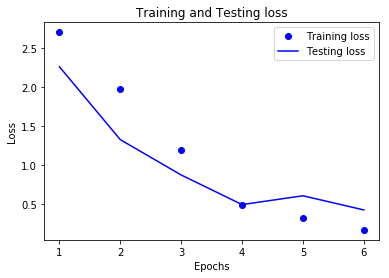

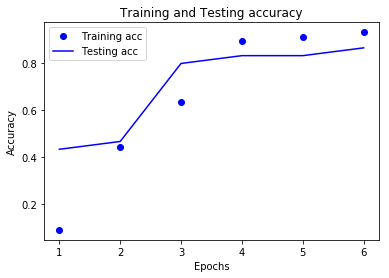

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(243, 320,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

from keras.utils import to_categorical
train_labels = to_categorical(trainlabel)
test_labels = to_categorical(testlabel)

#  after 6 it started deviatiing
history=model.fit(train_images, train_labels, epochs=6, batch_size=32,validation_data=(test_images, test_labels))
train_loss, test_acc = model.evaluate(train_images, train_labels)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Test Loss: " + repr(test_loss))


import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Testing acc')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Adding Dropouts

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 241, 318, 64)      640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 120, 159, 64)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 120, 159, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 118, 157, 64)      36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 59, 78, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 59, 78, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 294528)            0         
__________

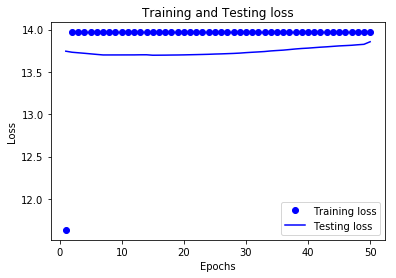

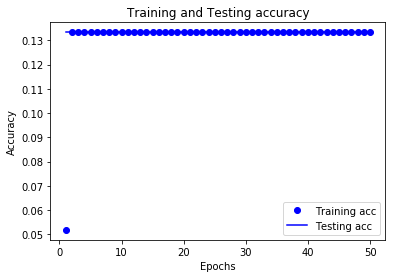

In [0]:
from keras import layers
from keras import models
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(243, 320,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

from keras.utils import to_categorical
train_labels = to_categorical(trainlabel)
test_labels = to_categorical(testlabel)

#  after 6 it started deviatiing
history=model.fit(train_images, train_labels, epochs=50, batch_size=32,validation_data=(test_images, test_labels))
train_loss, test_acc = model.evaluate(train_images, train_labels)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Test Loss: " + repr(test_loss))


import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Testing acc')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Using Data Augmentation


In [0]:
from google.colab import drive
drive.mount('/content/drive')
import os
original_dir='/content/drive/My Drive/yalefaces'
base_dir='/content/drive/My Drive/newfaces'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
os.chdir('/content/drive/My Drive/newfaces/train')
os.mkdir('subject01')
os.mkdir('subject02')
os.mkdir('subject03')
os.mkdir('subject04')
os.mkdir('subject05')
os.mkdir('subject06')
os.mkdir('subject07')
os.mkdir('subject08')
os.mkdir('subject09')
os.mkdir('subject10')
os.mkdir('subject11')
os.mkdir('subject12')
os.mkdir('subject13')
os.mkdir('subject14')
os.mkdir('subject15')

validation_dir = os.path.join(base_dir, 'validation')
os.chdir('/content/drive/My Drive/newfaces/validation')
os.mkdir('subject01')
os.mkdir('subject02')
os.mkdir('subject03')
os.mkdir('subject04')
os.mkdir('subject05')
os.mkdir('subject06')
os.mkdir('subject07')
os.mkdir('subject08')
os.mkdir('subject09')
os.mkdir('subject10')
os.mkdir('subject11')
os.mkdir('subject12')
os.mkdir('subject13')
os.mkdir('subject14')
os.mkdir('subject15')  

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
os.chdir('/content/drive/My Drive/newfaces/test')
os.mkdir('subject01')
os.mkdir('subject02')
os.mkdir('subject03')
os.mkdir('subject04')
os.mkdir('subject05')
os.mkdir('subject06')
os.mkdir('subject07')
os.mkdir('subject08')
os.mkdir('subject09')
os.mkdir('subject10')
os.mkdir('subject11')
os.mkdir('subject12')
os.mkdir('subject13')
os.mkdir('subject14')
os.mkdir('subject15')
os.mkdir('test_folder')
os.chdir('/content/drive/My Drive/yalefaces')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


To split train,validation and test to respective directories

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/newfaces/train",
    target_size=(243, 320),
    color_mode="grayscale",
    batch_size=16,
    class_mode="categorical",
    shuffle=True,
    seed=42)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(243, 320),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42)

test_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(243, 320),
    color_mode="grayscale",
    batch_size=30,
    class_mode="categorical",
    shuffle=True,
    seed=42)


Using TensorFlow backend.


Found 120 images belonging to 15 classes.
Found 15 images belonging to 15 classes.
Found 30 images belonging to 15 classes.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 241, 318, 128)     1280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 120, 159, 128)     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 118, 157, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 59, 78, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 57, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 38, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 36, 128)       147584    
__________

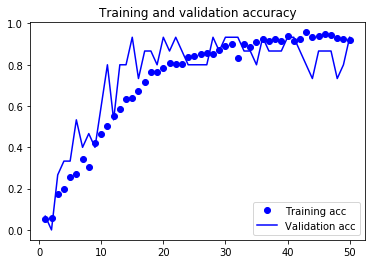

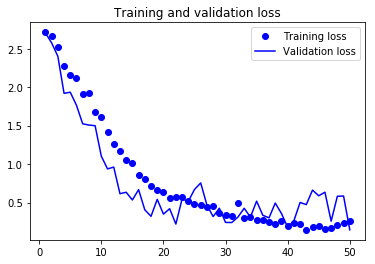

In [0]:
import numpy as np
from keras import layers
from keras import models
from keras.layers import Dropout


model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(243, 320,1)))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()


history = model.fit_generator(
train_generator,
steps_per_epoch=30,
epochs=50,
validation_data=validation_generator,
validation_steps=15)



train_loss, test_acc = model.evaluate_generator(generator=train_generator,steps=50)
print("Train Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))

train_loss, test_acc = model.evaluate_generator(generator=validation_generator,steps=15)
print("Validation Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))

train_loss, test_acc = model.evaluate_generator(generator=test_generator,steps=30)
print("Testing Accuracy: "+ repr(test_acc*100) + '%')
print("Testing Loss: " + repr(train_loss))

test_generator.reset()
pred=model.predict_generator(test_generator,steps=30)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()